# Context
Predict heart disease in patients by training classification models on the target variable heart disease.

# Content
* This dataset contains about records of patients.
 
 
* Heart disease is the target variable to predict. It means -- patient has heart disease Yes or No?

# Data Description


* Age - Age of Patient.
* Sex -  0 = Male, 1 = Female.
* BP - BP of the patient.
* Cholestrol - Cholestrol of the patient.
* Heart Disease -  0 = The patient is not having Heart Disease and 1 = Patient is having heart disease

# Patient has Heart Disease or Not
The targets of the analysis are:

* To analyze the dataset content using EDA and to understand if it's possible build one model allowing to predict heart diseaes in the patients or not.  


* To train a model allowing to predict heart disease in a patient with the highest accuracy, F1 score and ROC-AUC metric.


* To evaluate feature importance of a model and to analyze the most impactful factors. The dataset was taken from Kaggle repository: Heart Disease.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
df.duplicated().sum()

0

In [4]:
xyz = df['heart disease']

In [5]:
df = df.drop('heart disease',axis=1)

In [6]:
df.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [7]:
xyz.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [8]:
df.isnull().sum()

age           0
sex           0
BP            0
cholestrol    0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Visualising the Data for better understanding

## Univariate Analysis :- 

<AxesSubplot:xlabel='heart disease', ylabel='count'>

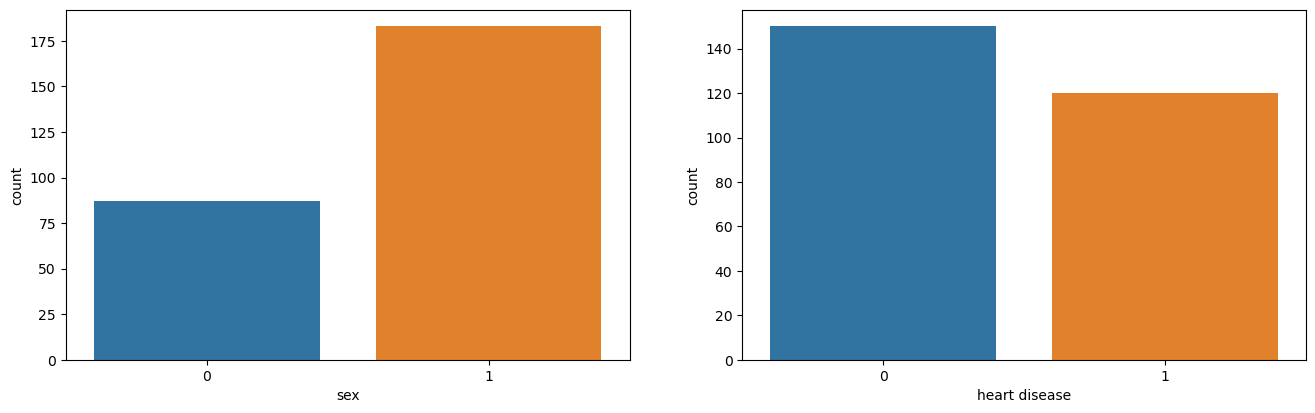

In [10]:
plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
sns.countplot(df['sex'])
plt.subplot(2,2,2)
sns.countplot(xyz)

Conclusion:- 


* We have more females as compare male.


* We have less patients who have heart disease as compare to patients who have not heart disease.

<AxesSubplot:xlabel='cholestrol', ylabel='Density'>

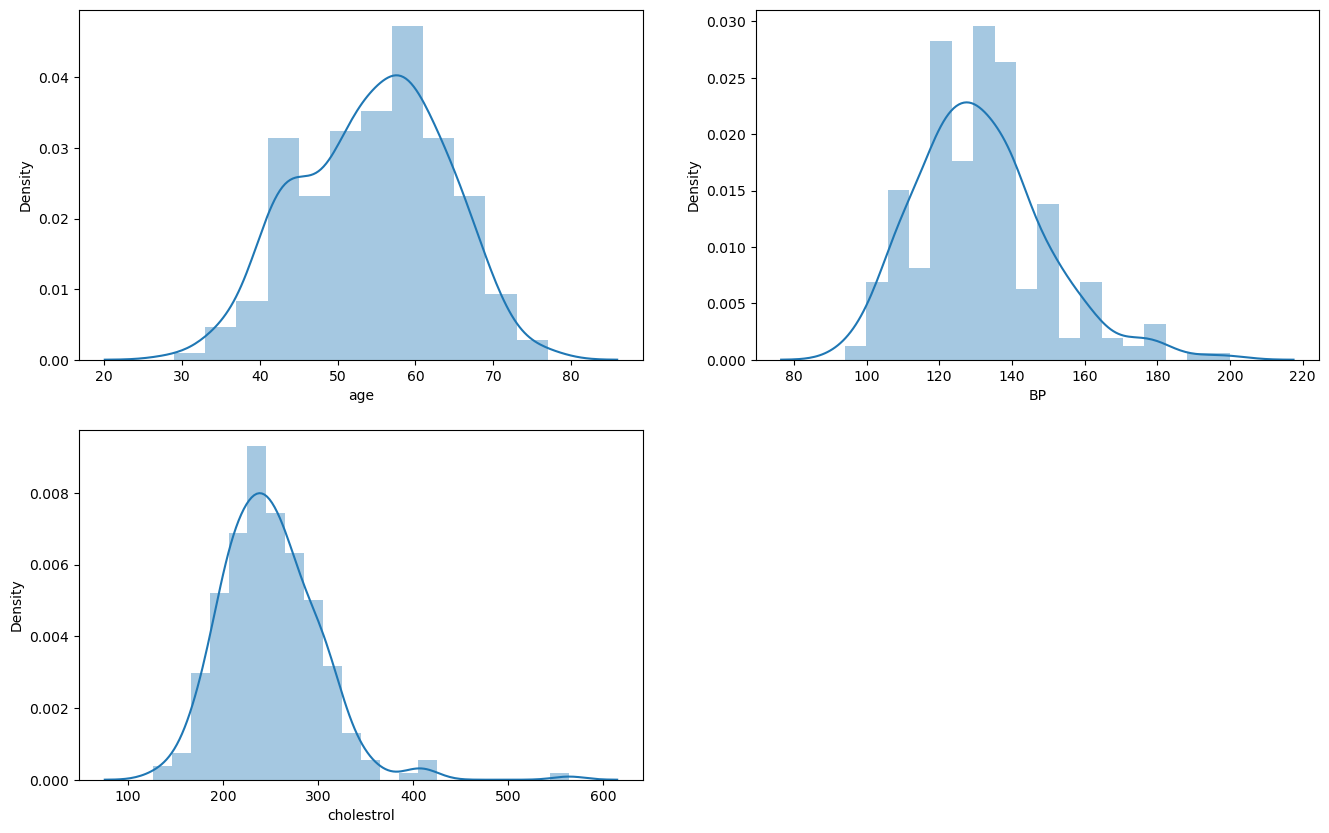

In [11]:
plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
sns.distplot(df['age'])
plt.subplot(2,2,2)
sns.distplot(df['BP'])
plt.subplot(2,2,3)
sns.distplot(df['cholestrol'])

Conclusion:-
    

* Maximum people belongs to 50-70 yrs. of age. 


* BP of people maximum ranges between 120-140.


* cholestrol of people maximum ranges between 200-300.

## Bivariate Analysis and Multivariate Analysis :- 

### BP of Persons according to their Age

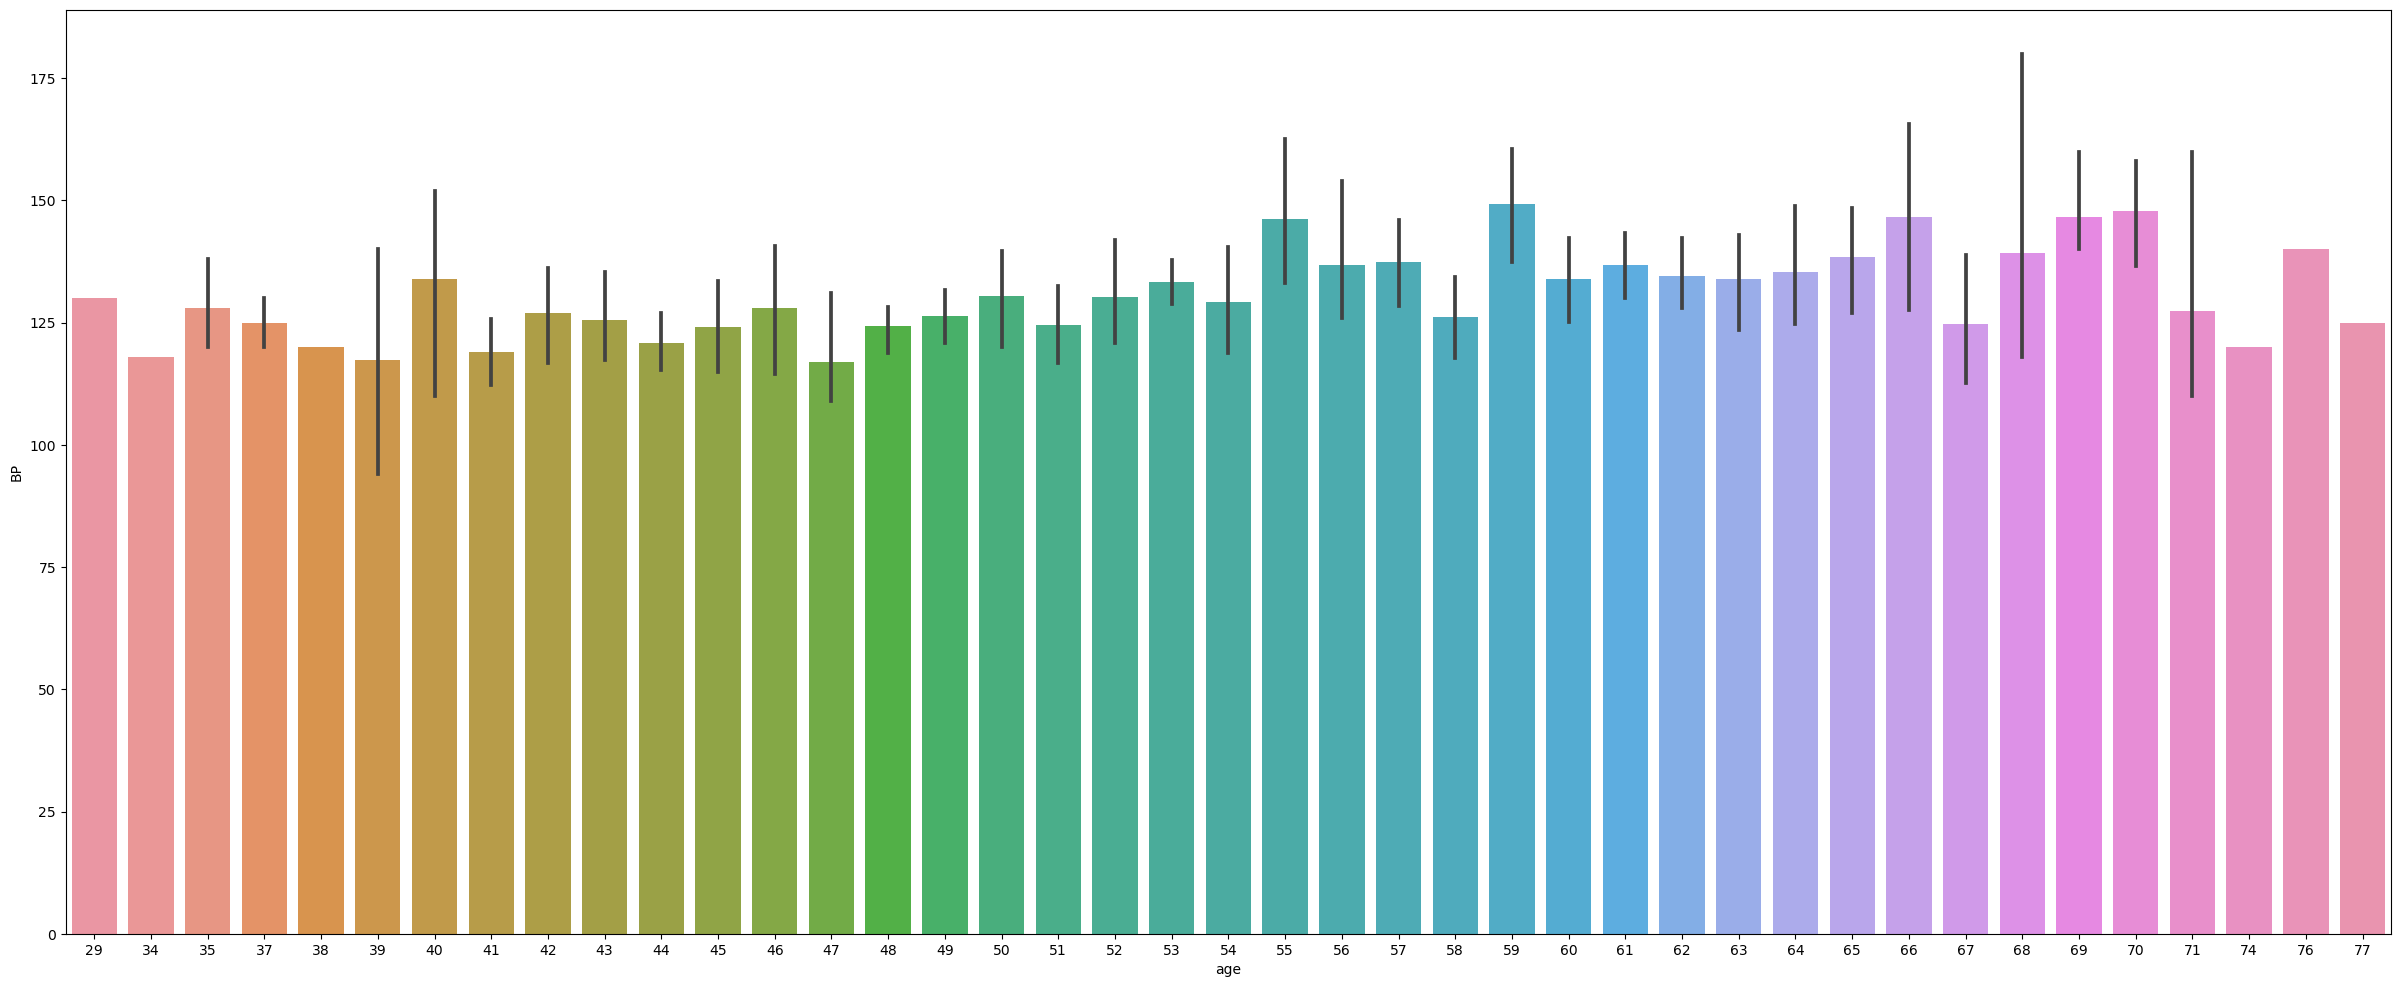

In [12]:
plt.figure(figsize=(30, 12))
sns.barplot(df['age'],df['BP'])
plt.show()

Conclusion :-

    
* The persons of age 40, 55, 59, 66, 69 and 70 have high BP as compare to others.

### Cholestrol of Persons according to their Age

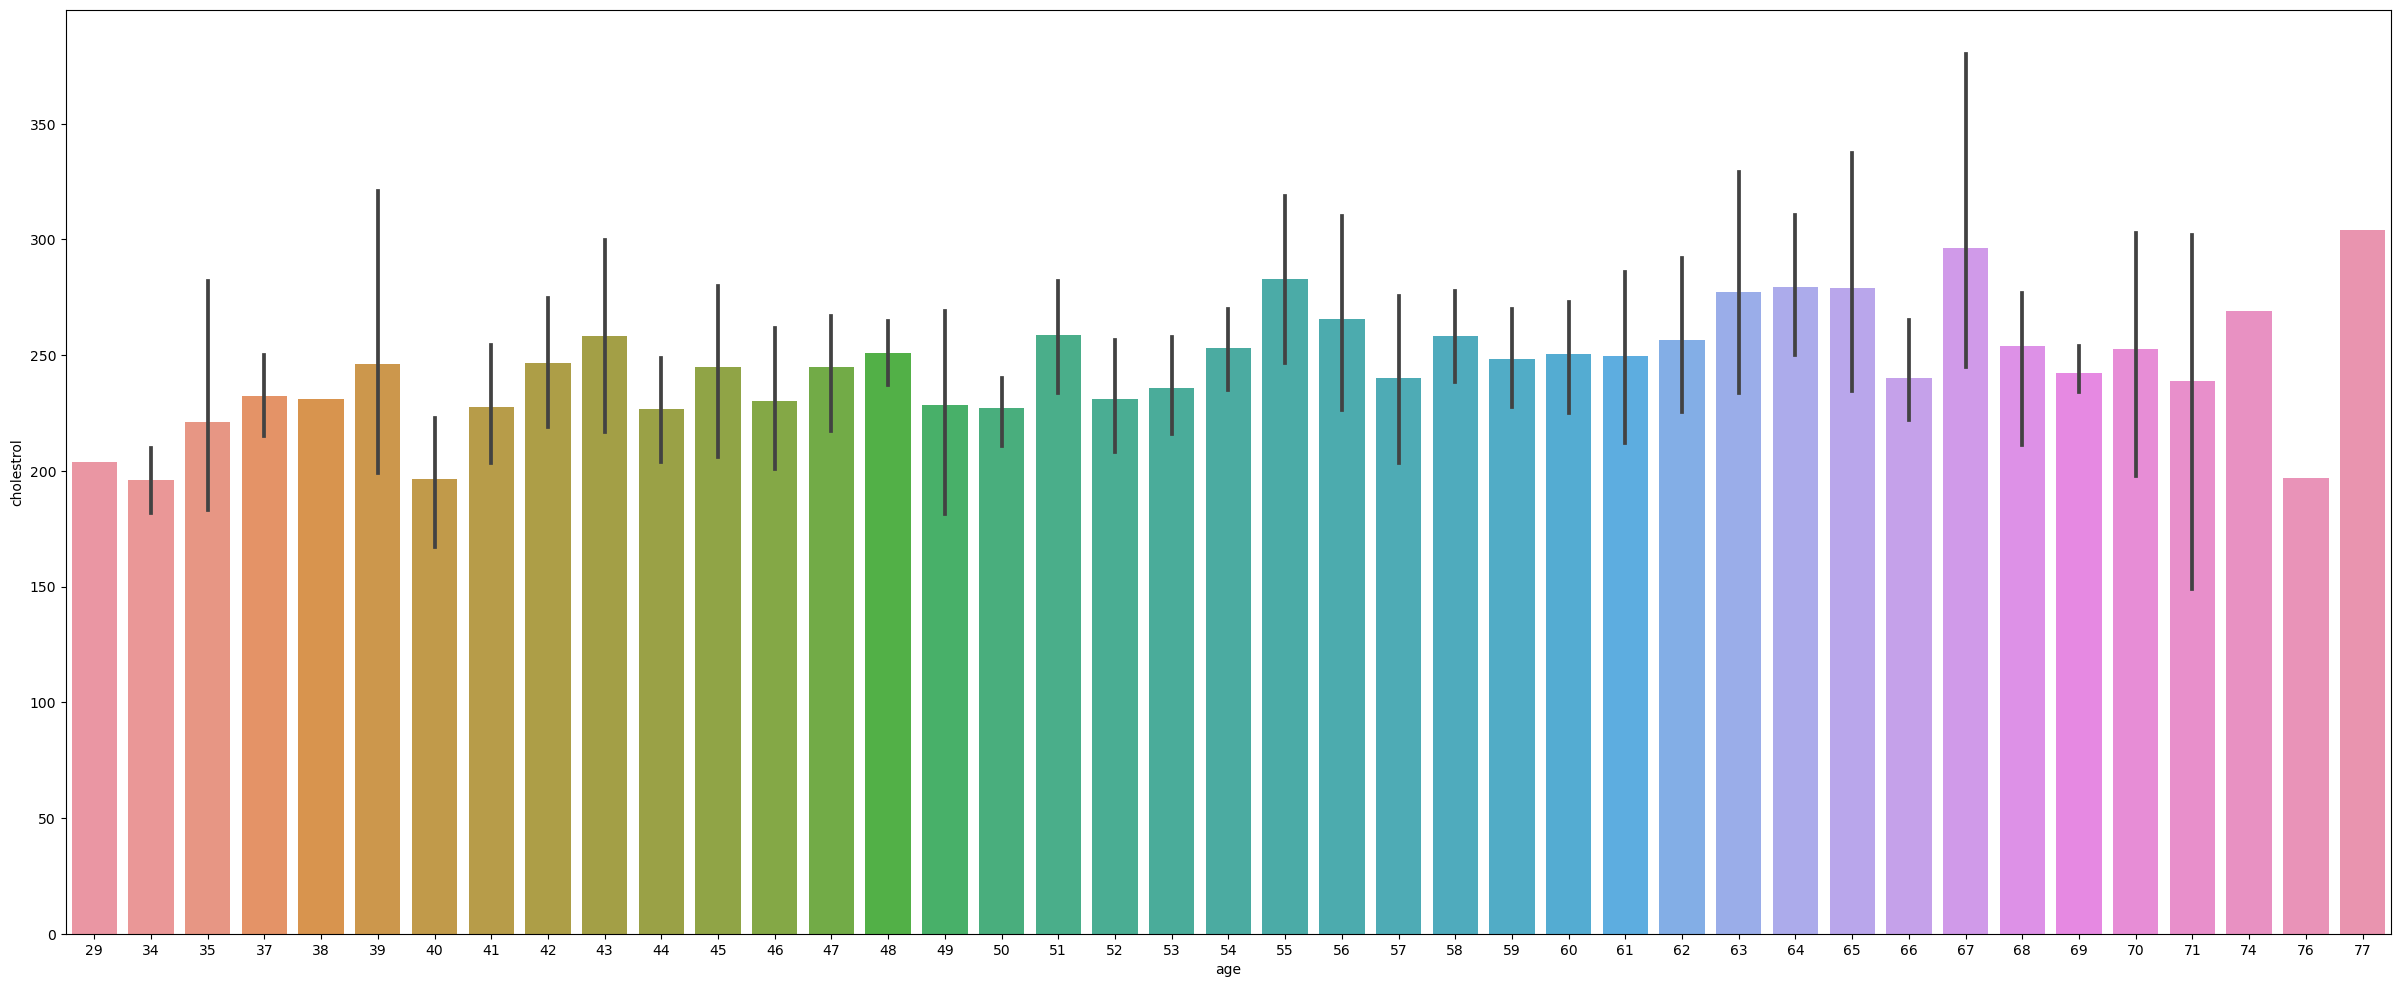

In [13]:
plt.figure(figsize=(30, 12))
sns.barplot(df['age'],df['cholestrol'])
plt.show()

Conclusion :-

    
* The persons of age 55 and 67 have high cholestrol as compare to others.

### BP of Persons according to their Sex

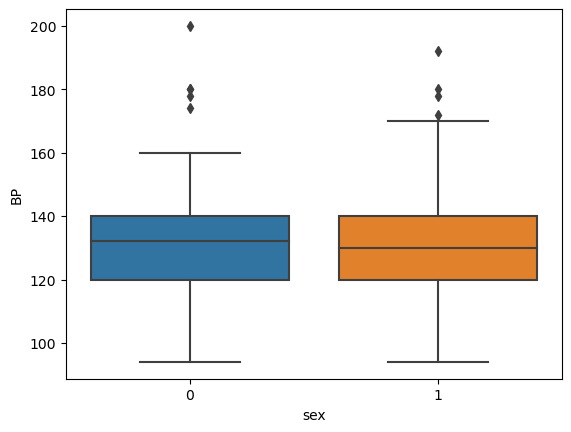

In [14]:
sns.boxplot(df['sex'],df['BP'])
plt.show()

### Cholestrol of Persons according to their Sex

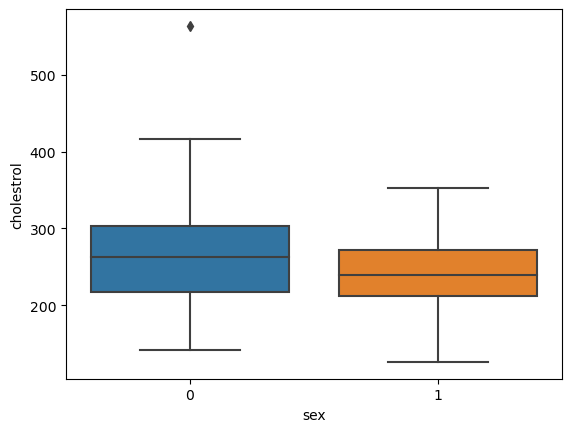

In [15]:
sns.boxplot(df['sex'],df['cholestrol'])
plt.show()

Conclusion :- Male have the high BP and high cholestrol than female.

# Dealing with outliers

In [16]:
df.shape

(270, 4)

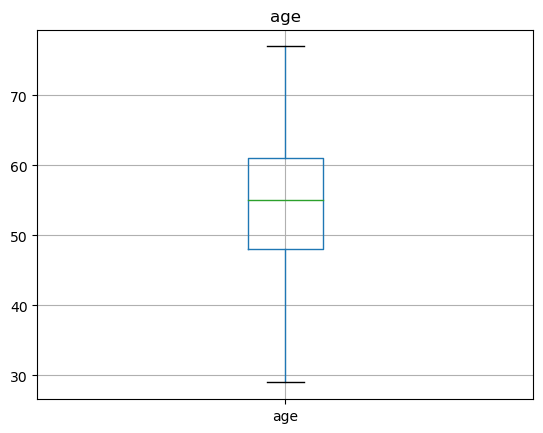

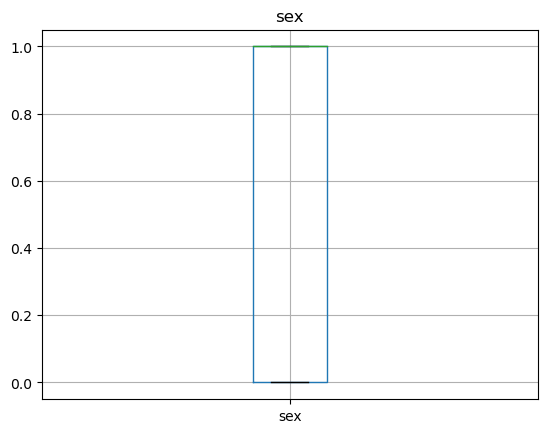

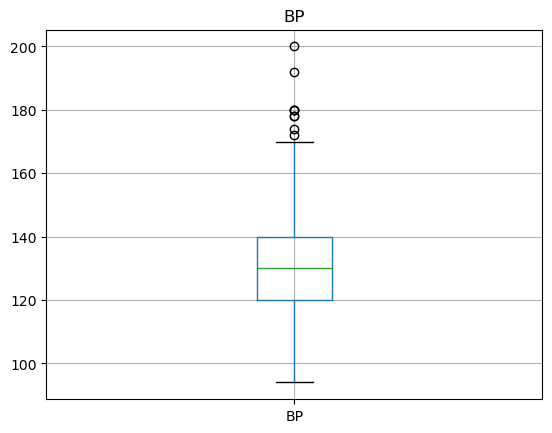

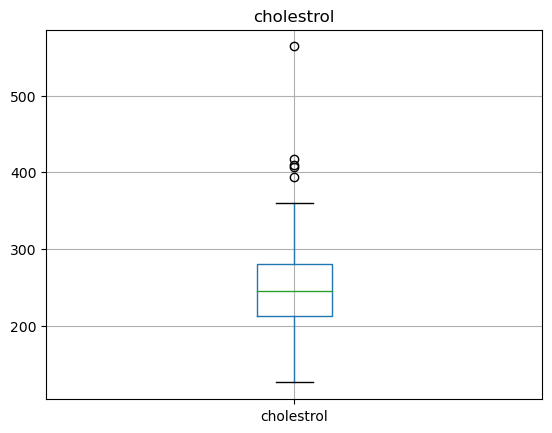

In [17]:
for col in df.columns:
    if df[col].dtype != 'object': # exclude non-numeric columns
        df[[col]].boxplot()
        plt.title(col)
        plt.show()

## As we see we have outliers in only 2 columns 'BP' and 'cholestrol'. So, we remove the outliers

In [18]:
df = df.drop(index = df[(df['BP'] > 185)].index)
df = df.drop(index = df[(df['cholestrol'] > 500)].index)

df.shape

(267, 4)

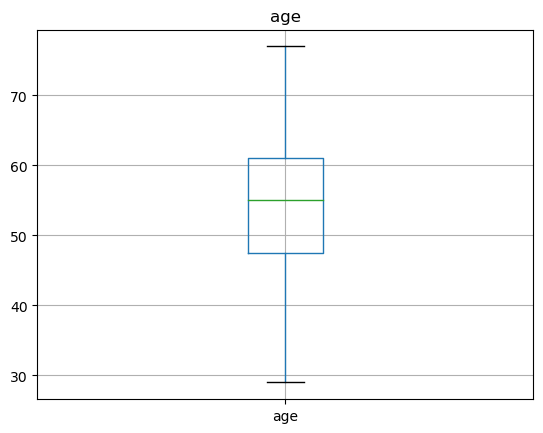

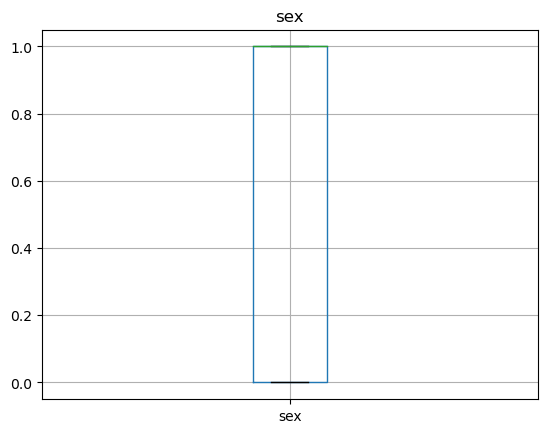

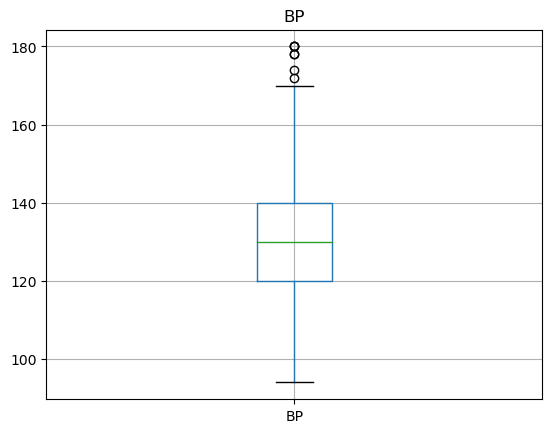

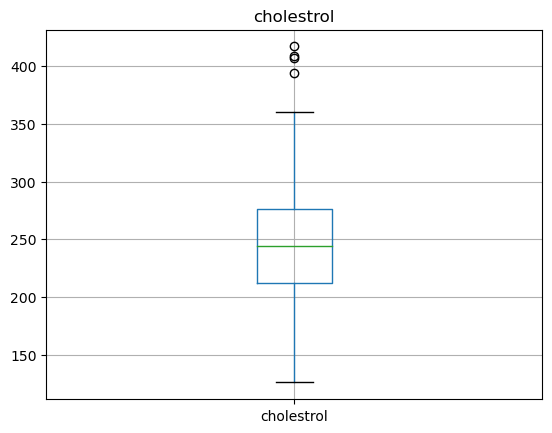

In [19]:
for col in df.columns:
    if df[col].dtype != 'object': # exclude non-numeric columns
        df[[col]].boxplot()
        plt.title(col)
        plt.show()

### As you see we remove all the outliers in dataset.

# Scaling the Features

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['age','BP','cholestrol']] = scaler.fit_transform(df[['age','BP','cholestrol']])

In [21]:
df.head()

,age,sex,BP,cholestrol
0,1.714372,1,-0.054214,1.535340
2,0.287373,1,-0.407269,0.266060
3,1.055757,1,-0.171899,0.307676
4,2.153448,0,-0.642639,0.432523
5,1.165526,1,-0.642639,-1.481801


# Implementation for computing Hopkins' Statistic:


* A value for Hopkins' Statistic higher than 0.75 indicates a clustering tendency at the 90% confidence level.


* We can interpret Hopkins' statistic in the following manner:


* If the value is between {0.01, ...,0.3}, the data is regularly spaced.


* If the value is around 0.5, it is random.


* If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [22]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np

# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):
    
    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    
    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
   
    
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=1)
    nbrs=neigh.fit(X)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    
 
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [23]:
hopkins_statistic(df)

0.7488916717349312

In [24]:
l = [] #list to hold values for each call
for i in range(20):
    H=hopkins_statistic(df)
    l.append(H)
#print average value:
np.mean(l)

0.702765343366021

Conclusion :- We have average hopkins score. So, we decide to cluster the data.

# Model Building

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=5,max_iter=100)
kmeans.fit(df)

KMeans(max_iter=100, n_clusters=5)

In [27]:
kmeans.labels_

array([2, 2, 2, 2, 4, 2, 2, 3, 3, 4, 4, 1, 4, 3, 4, 3, 4, 2, 1, 2, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 4, 0, 1, 0, 4, 1, 4, 0, 1, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 0, 0, 3, 4, 3, 4, 1, 1, 4, 4, 0, 2, 4, 3, 1, 0, 4, 0, 4,
       3, 1, 1, 2, 3, 0, 4, 2, 3, 1, 1, 1, 2, 4, 1, 0, 1, 2, 1, 4, 0, 3,
       4, 4, 3, 2, 1, 4, 1, 2, 2, 3, 1, 1, 2, 3, 0, 2, 1, 1, 0, 4, 1, 0,
       1, 0, 3, 1, 3, 1, 0, 2, 1, 2, 0, 0, 2, 4, 2, 4, 4, 2, 2, 2, 1, 2,
       4, 4, 0, 2, 1, 4, 4, 2, 4, 1, 2, 1, 1, 4, 1, 1, 1, 2, 3, 1, 1, 4,
       3, 4, 0, 1, 0, 2, 2, 1, 0, 1, 4, 1, 2, 0, 0, 2, 2, 1, 3, 3, 4, 2,
       4, 1, 3, 1, 1, 4, 3, 4, 1, 3, 0, 4, 4, 2, 1, 1, 4, 2, 1, 0, 2, 2,
       2, 2, 3, 0, 3, 2, 2, 2, 1, 0, 1, 1, 4, 1, 1, 2, 1, 2, 1, 2, 2, 4,
       3, 1, 1, 2, 3, 0, 1, 3, 1, 1, 2, 4, 4, 4, 1, 1, 3, 0, 3, 3, 0, 3,
       2, 2, 0, 4, 0, 4, 1, 1, 1, 4, 0, 0, 3, 3, 1, 3, 4, 2, 1, 1, 0, 1,
       3, 4, 0])

# Finding the optimal number of cluster using Elbow Curve


* We can find the elbow point by seeing the graph to select the number of clusters of our dataset.


* Where the curve is stabalize is called elbow point.

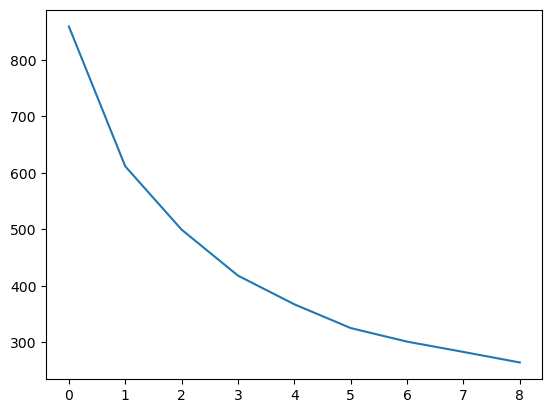

In [28]:
wcss = []
range_n_clusters = [1,2,3,4,5,6,7,8,9]
for i in range_n_clusters:
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)
    
plt.plot(wcss)

## as we see 6 or 7 clusters are best for our dataset but we check again to confrim with the help of Silhouette Analysis

# Silhouette Analysis

* Silhouette analysis is a method for evaluating the quality of clustering results. It provides a way to quantify how well each data point fits into its assigned cluster and how separated the clusters are from each other. The technique produces a silhouette score for each data point, which is a measure of how similar that point is to its own cluster compared to other clusters. The silhouette score ranges from -1 to +1, with higher values indicating better clustering.


* In silhouette analysis, each data point is first assigned to a cluster based on a clustering algorithm. Then, the silhouette score is calculated for each data point as follows:


* Compute the average distance between the data point and all other points in the same cluster. This is denoted as a(i).


* Compute the average distance between the data point and all points in the nearest cluster (i.e., the cluster that the data point is not a part of). This is denoted as b(i).


* Compute the silhouette score as (b(i) - a(i)) / max(a(i), b(i)).

In [29]:
from sklearn.metrics import silhouette_score

# Range of number of clusters to try
range_n_clusters = range(2, 11)

# Compute silhouette scores
silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=123)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.3f}")

For n_clusters = 2, the average silhouette score is 0.250
For n_clusters = 3, the average silhouette score is 0.222
For n_clusters = 4, the average silhouette score is 0.233
For n_clusters = 5, the average silhouette score is 0.227
For n_clusters = 6, the average silhouette score is 0.229
For n_clusters = 7, the average silhouette score is 0.217
For n_clusters = 8, the average silhouette score is 0.221
For n_clusters = 9, the average silhouette score is 0.216
For n_clusters = 10, the average silhouette score is 0.205


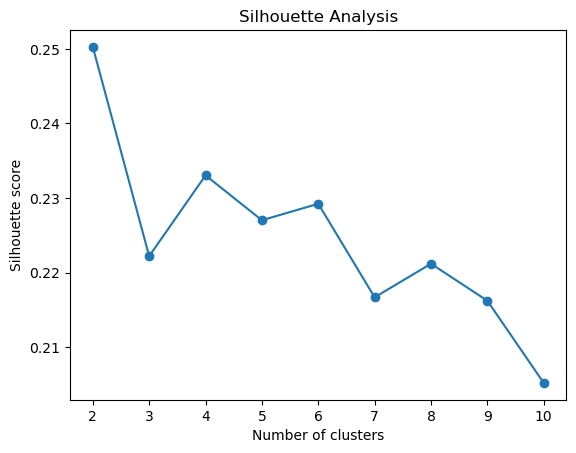

In [30]:
# Plot silhouette scores as a line plot
plt.plot(range_n_clusters, silhouette_scores, '-o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette Analysis")
plt.show()

## Max Silhouette Score as k = 2, Hence 2 Clusters is the right option. But we can again check with the help of cluster visualization

# Visualization of Clusters (K=2)

* It is a technique by which we visualize the quality of clusters.

In [31]:
kmeans = KMeans(n_clusters=2,max_iter=100)
kmeans.fit(df)
clusters=kmeans.labels_

Text(0.5, 1.0, 'PCA Plot of Clusters')

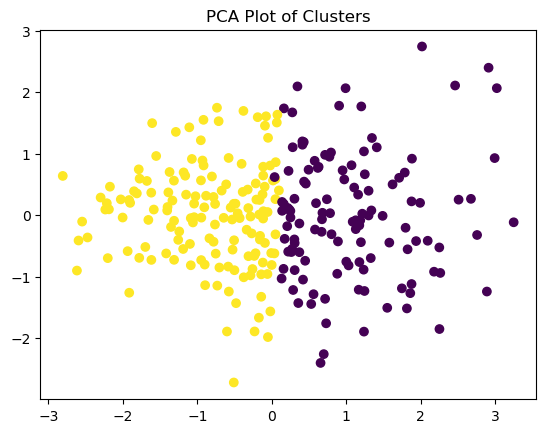

In [32]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters)
plt.title("PCA Plot of Clusters")

PCA : Principal Component Analysis, it will reduce the dimension of data set to 2d or 3d. It is not possible to plot all the features of dataset in a single graph. So, we use PCA to reduce the dimension then we will see the whole dataset or datapoints in a single graph.

In [33]:
df_pca

array([[ 1.78430081e+00,  6.94576110e-01],
       [ 4.76999716e-02,  2.61819111e-01],
       [ 6.73268397e-01, -6.55249409e-02],
       [ 1.18673027e+00, -8.21829388e-02],
       [-4.80318551e-01, -1.42937612e+00],
       [ 1.38003652e-01,  7.22208346e-02],
       [-5.52412935e-01,  1.25030128e-01],
       [ 1.15802965e+00,  3.35529248e-01],
       [ 3.01990430e+00,  2.06669568e+00],
       [ 2.72254225e-01, -5.46725082e-01],
       [ 3.42284887e-02, -6.20215718e-01],
       [-5.33281190e-01, -6.92675829e-02],
       [ 3.69390818e-01, -6.00257070e-01],
       [ 7.14475299e-01,  9.82376217e-01],
       [-6.02458377e-01, -1.89012395e+00],
       [ 4.28297384e-01,  1.19024125e+00],
       [-2.87073675e-01, -9.77944043e-01],
       [-5.27170625e-01, -5.59539056e-01],
       [-1.19070587e+00, -5.48525678e-01],
       [ 2.19384339e-01, -5.91886509e-01],
       [-5.11245007e-01,  1.86336836e-01],
       [-7.36677469e-01,  1.74873077e+00],
       [-1.65781046e+00, -7.58091165e-02],
       [ 4.

# Visualization of Clusters (K=3)

In [34]:
kmeans = KMeans(n_clusters=3,max_iter=100)
kmeans.fit(df)
cluster=kmeans.labels_

Text(0.5, 1.0, 'PCA Plot of Clusters')

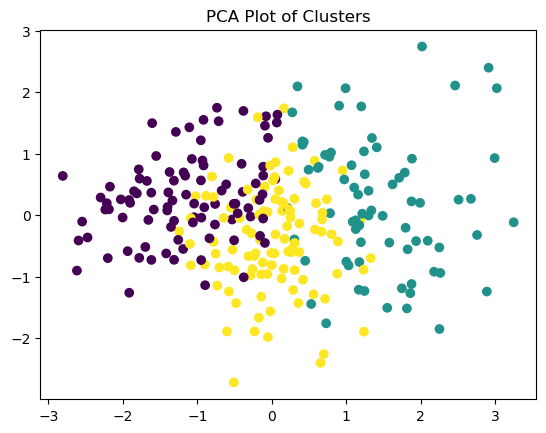

In [35]:
# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster)
plt.title("PCA Plot of Clusters")

## By Clustering Visualization we find that K=2 is the right option 

In [36]:
kmeans = KMeans(n_clusters=2,max_iter=100)
kmeans.fit(df)
kmeans.labels_

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1])

In [37]:
# Assigning these label to dataset

df['Cluster_ID'] = clusters
df.head()

,age,sex,BP,cholestrol,Cluster_ID
0,1.714372,1,-0.054214,1.535340,0
2,0.287373,1,-0.407269,0.266060,1
3,1.055757,1,-0.171899,0.307676,0
4,2.153448,0,-0.642639,0.432523,0
5,1.165526,1,-0.642639,-1.481801,1


# Visualization of Data with respect to Cluster_ID 

<AxesSubplot:xlabel='Cluster_ID', ylabel='cholestrol'>

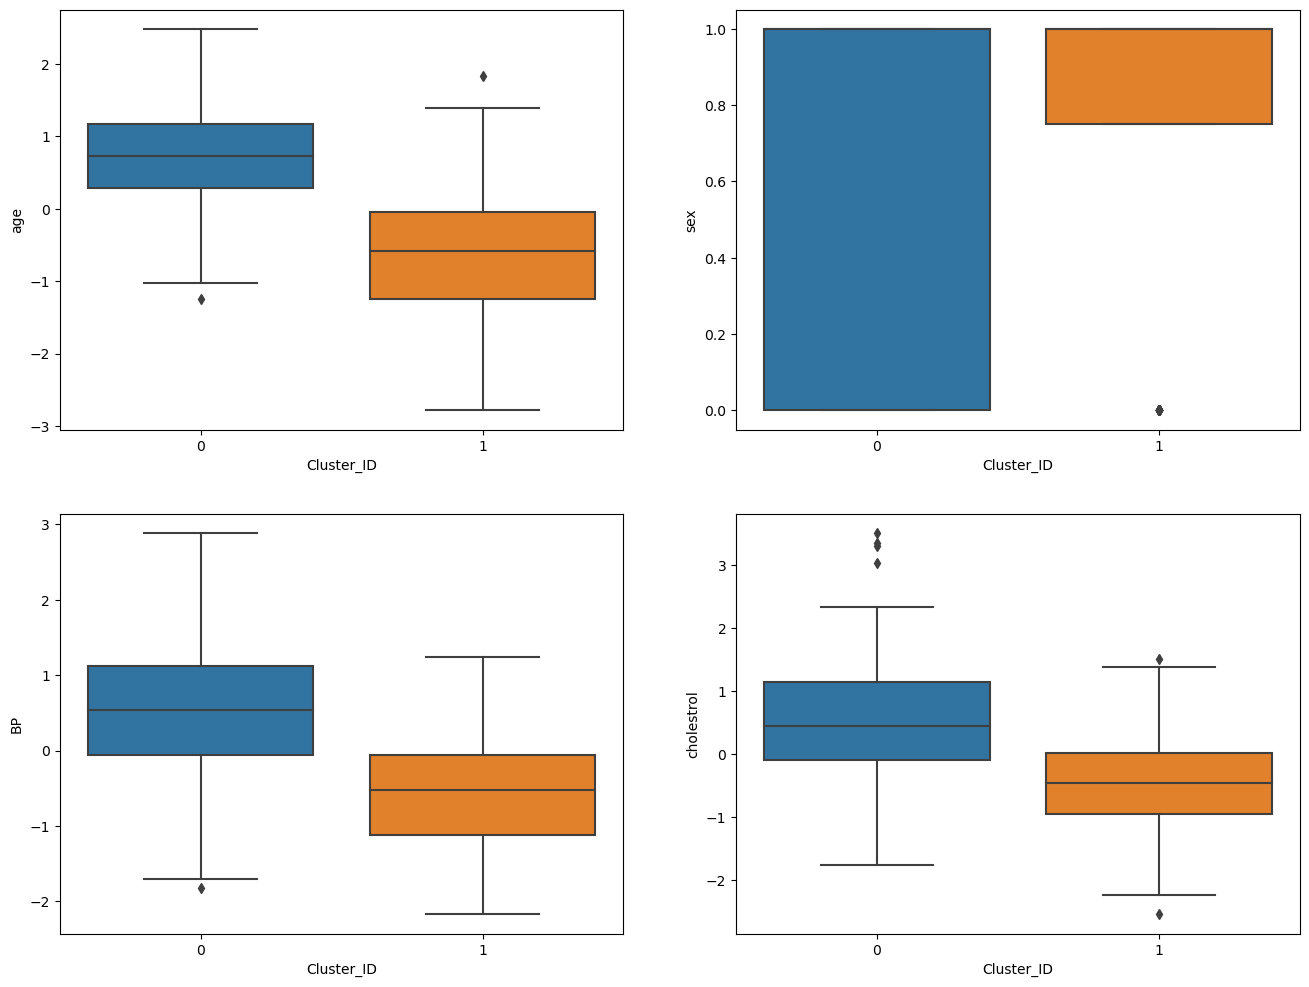

In [38]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.boxplot(x='Cluster_ID',y='age',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Cluster_ID',y='sex',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Cluster_ID',y='BP',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Cluster_ID',y='cholestrol',data=df)

Conclusion :- Cluster 1 has people of higher age which having high BP and high cholestrol.

# HIERARCHICAL CLUSTERING

In [39]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

* Linkage : It is a parameter in Agglomerative Clustering to select the type of Agglomerative Clustering.


* There are 4 types of Agglomerative Clustering / Linkage Parameter :-


* 1) Min (single)


* 2) Max (complete)


* 3) Average


* 4) Ward

## 1) Single Linkage

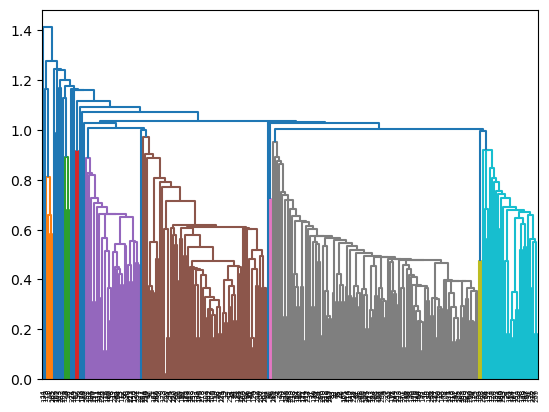

In [40]:
# single linkage 

mergings = linkage(df, method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [41]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
labels_=cluster.fit_predict(df)

Text(0.5, 1.0, 'PCA Plot of Clusters')

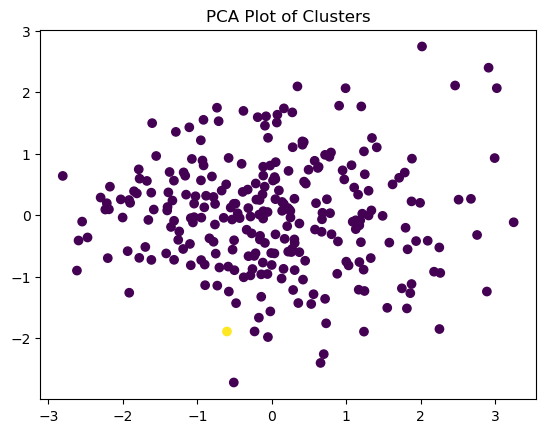

In [42]:
# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_)
plt.title("PCA Plot of Clusters")

## 2) Complete Linkage 

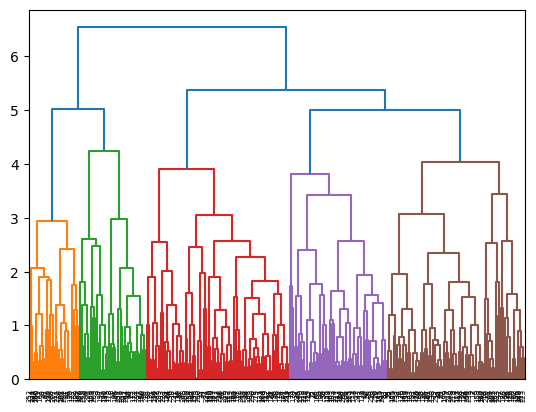

In [43]:
# complete linkage 

mergings = linkage(df, method = 'complete', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [44]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels=cluster.fit_predict(df)

Text(0.5, 1.0, 'PCA Plot of Clusters')

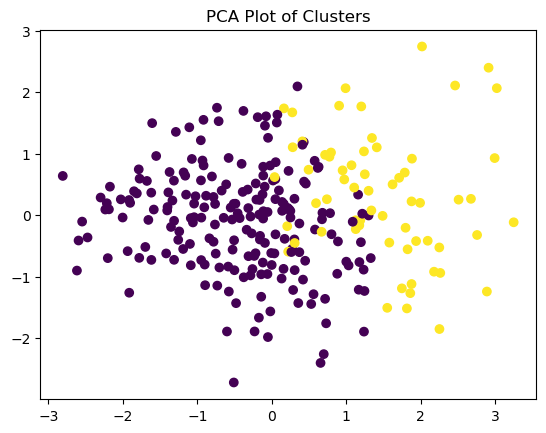

In [45]:
# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels)
plt.title("PCA Plot of Clusters")

## 3) Average Linkage

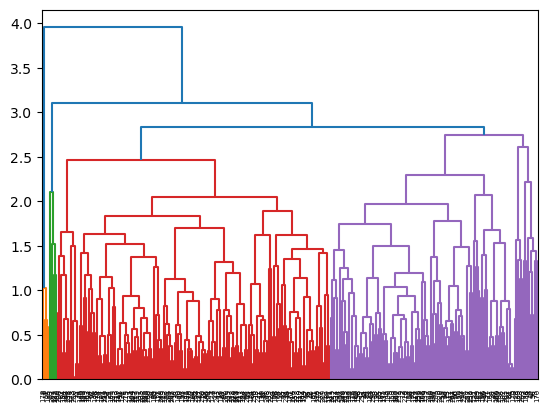

In [46]:
# complete linkage 

mergings = linkage(df, method = 'average', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [47]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
labels_=cluster.fit_predict(df)

Text(0.5, 1.0, 'PCA Plot of Clusters')

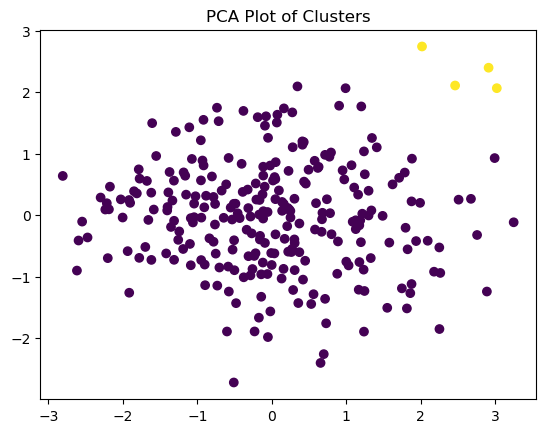

In [48]:
# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_)
plt.title("PCA Plot of Clusters")

## 4) Ward Linkage

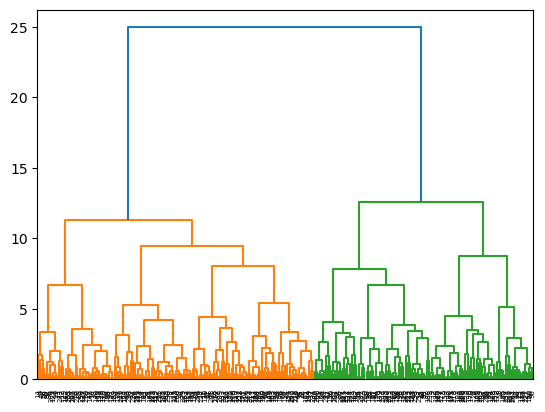

In [49]:
# complete linkage 

mergings = linkage(df, method = 'ward', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [50]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels_=cluster.fit_predict(df)

Text(0.5, 1.0, 'PCA Plot of Clusters')

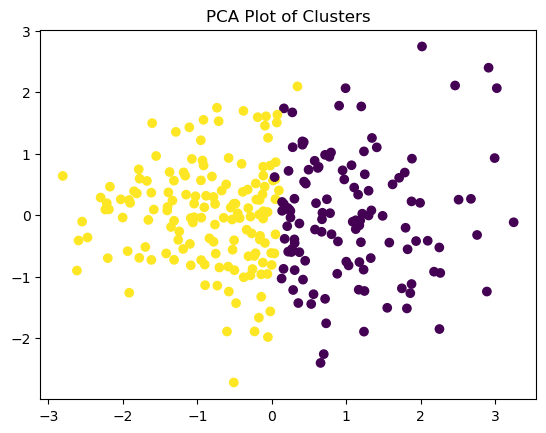

In [51]:
# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_)
plt.title("PCA Plot of Clusters")

## As I see K-Mean Clustering perform better in this Dataset rather than Hierarchical Clustering. So, I will Select K-Mean Clustering and reject hierarchical Clustering

In [52]:
df.head()

,age,sex,BP,cholestrol,Cluster_ID
0,1.714372,1,-0.054214,1.535340,0
2,0.287373,1,-0.407269,0.266060,1
3,1.055757,1,-0.171899,0.307676,0
4,2.153448,0,-0.642639,0.432523,0
5,1.165526,1,-0.642639,-1.481801,1


# We apply Supervised Machine Learning Algorithms to get efficient Result and make a model which predicts the possibility of heart disease in patients.

This is a Classification Problem. So, we use Algorithms of Classification

# Preparing New Data Frame for Classification

In [53]:
df.shape

(267, 5)

In [54]:
# adding the prediction column

new_df = pd.concat([df, xyz], axis=1)

In [55]:
new_df

,age,sex,BP,cholestrol,Cluster_ID,heart disease
0,1.714372,1.0,-0.054214,1.535340,0.0,1
2,0.287373,1.0,-0.407269,0.266060,1.0,1
3,1.055757,1.0,-0.171899,0.307676,0.0,0
4,2.153448,0.0,-0.642639,0.432523,0.0,0
5,1.165526,1.0,-0.642639,-1.481801,1.0,0
...,...,...,...,...,...,...
268,0.287373,1.0,0.534210,-1.169683,1.0,0
269,1.385064,1.0,1.711060,0.786257,0.0,1
1,NaN,NaN,NaN,NaN,NaN,0
117,NaN,NaN,NaN,NaN,NaN,1


### droping the rows because these are rows which we remove due to outliers 

In [56]:
new_df.dropna(inplace=True)

In [57]:
new_df

,age,sex,BP,cholestrol,Cluster_ID,heart disease
0,1.714372,1.0,-0.054214,1.535340,0.0,1
2,0.287373,1.0,-0.407269,0.266060,1.0,1
3,1.055757,1.0,-0.171899,0.307676,0.0,0
4,2.153448,0.0,-0.642639,0.432523,0.0,0
5,1.165526,1.0,-0.642639,-1.481801,1.0,0
...,...,...,...,...,...,...
265,-0.261473,1.0,2.417169,-1.024028,0.0,0
266,-1.139626,1.0,-0.642639,0.307676,1.0,0
267,0.177604,0.0,0.534210,0.952720,0.0,0
268,0.287373,1.0,0.534210,-1.169683,1.0,0


In [58]:
# use the rename() method to rename the column
new_df = new_df.rename(columns={'heart disease': 'heart_disease'})

In [59]:
new_df.head(3)

,age,sex,BP,cholestrol,Cluster_ID,heart_disease
0,1.714372,1.0,-0.054214,1.535340,0.0,1
2,0.287373,1.0,-0.407269,0.266060,1.0,1
3,1.055757,1.0,-0.171899,0.307676,0.0,0


In [60]:
new_df.duplicated().sum()

0

In [61]:
new_df.shape

(267, 6)

## Check the Correlation before making the model

<AxesSubplot:>

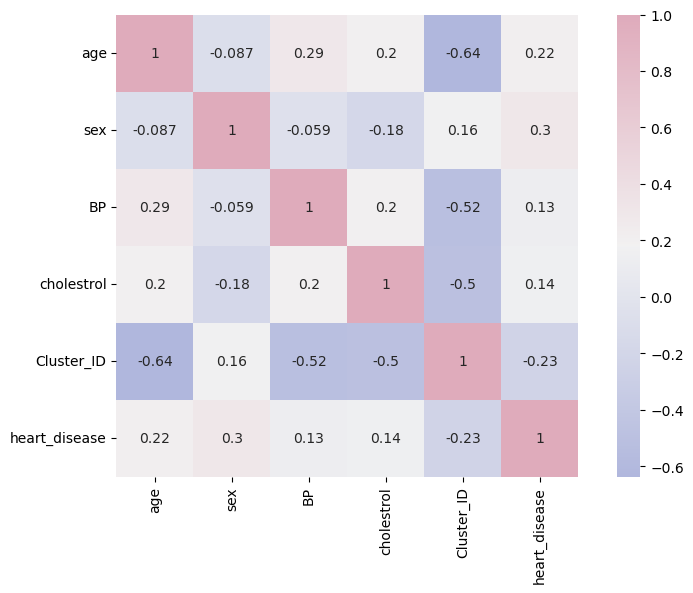

In [62]:
# Correlation amongst numeric attributes

corrmat = new_df.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(10,6))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

## No column is high corrleated. So, we don't drop any of column

In [63]:
new_df.heart_disease.value_counts()

0    149
1    118
Name: heart_disease, dtype: int64

Data Set seems like balanced and not containing outliers.

# train_test_split

In [64]:
X = new_df.drop('heart_disease',axis=1)
y = new_df['heart_disease']

In [65]:
X.head()

,age,sex,BP,cholestrol,Cluster_ID
0,1.714372,1.0,-0.054214,1.535340,0.0
2,0.287373,1.0,-0.407269,0.266060,1.0
3,1.055757,1.0,-0.171899,0.307676,0.0
4,2.153448,0.0,-0.642639,0.432523,0.0
5,1.165526,1.0,-0.642639,-1.481801,1.0


In [66]:
y.head()

0    1
2    1
3    0
4    0
5    0
Name: heart_disease, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

Conclusion :- We take 80% of data in training and 20% of data in testing because this is a small dataset and in classification problem we have to take large amount of data in training.

In [68]:
X_train.head()

,age,sex,BP,cholestrol,Cluster_ID
129,0.616681,1.0,-0.819166,-0.378984,1.0
226,0.836219,0.0,-0.054214,0.307676,0.0
91,0.726450,0.0,-0.054214,1.701803,0.0
268,0.287373,1.0,0.534210,-1.169683,1.0
80,0.397142,1.0,0.887265,-0.628678,0.0


In [69]:
y_train.head()

129    1
226    1
91     1
268    0
80     1
Name: heart_disease, dtype: int64

# Model Building

## We try differerent classification algorithms. The algorithm which gives better result we go with them otherwise we use some ensemble learning techniques.

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [71]:
clf1 = DecisionTreeClassifier()
clf2 = LogisticRegression()
clf3 = RandomForestClassifier()

In [72]:
# Fit and predict using individual classifiers

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
y_test_pred1 = clf1.predict(X_test)
y_test_pred2 = clf2.predict(X_test)
y_test_pred3 = clf3.predict(X_test)

y_train_pred1 = clf1.predict(X_train)
y_train_pred2 = clf2.predict(X_train)
y_train_pred3 = clf3.predict(X_train)

In [74]:
from sklearn.metrics import accuracy_score

# Compute testing accuracy score for individual classifiers

accuracy1 = accuracy_score(y_test, y_test_pred1)
accuracy2 = accuracy_score(y_test, y_test_pred2)
accuracy3 = accuracy_score(y_test, y_test_pred3)

# Compute training accuracy score for individual classifiers

accuracy4 = accuracy_score(y_train, y_train_pred1)
accuracy5 = accuracy_score(y_train, y_train_pred2)
accuracy6 = accuracy_score(y_train, y_train_pred3)

In [75]:
print('Decision Tree\n')
print("Train Performance :", accuracy4)
print("Test Performance :", accuracy1)
print("-"*50)
print('Logistic Regression\n')
print("Train Performance :", accuracy5)
print("Test Performance :", accuracy2)
print("-"*50)
print('Random Forest\n')
print("Train Performance :", accuracy6)
print("Test Performance :", accuracy3)

Decision Tree

Train Performance : 1.0
Test Performance : 0.6296296296296297
--------------------------------------------------
Logistic Regression

Train Performance : 0.6995305164319249
Test Performance : 0.6111111111111112
--------------------------------------------------
Random Forest

Train Performance : 1.0
Test Performance : 0.6481481481481481


### As we see all algorithms gives almost same result on test data and Decision Tree and Random Forest occurs  overfitting. Let's try ensemble learning algorithms.

# Let's use Voting Classifier and Check the Result with Hard Voting


* We use Voting Classifier because this is small dataset and voting classifier works good with small dataset.

In [76]:
from sklearn.ensemble import VotingClassifier

estimators=[('dt', clf1), ('lr', clf2), ('rf', clf3)]

voting_clf = VotingClassifier(estimators=estimators, voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier())])

In [77]:
# Predict on training and testing data

y_test_pred = voting_clf.predict(X_test)
y_train_pred = voting_clf.predict(X_train)

In [78]:
print("Train Performance :", accuracy_score(y_train, y_train_pred))
print("Test Performance :", accuracy_score(y_test, y_test_pred))

Train Performance : 1.0
Test Performance : 0.6851851851851852


# Let's use Voting Classifier and Check the Result with Soft Voting

In [79]:
voting_clf1 = VotingClassifier(estimators=estimators, voting='soft')

estimators=[('dt', clf1), ('lr', clf2), ('rf', clf3)]

voting_clf = VotingClassifier(estimators=estimators, voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [80]:
# Predict on training and testing data

y_test_pred = voting_clf.predict(X_test)
y_train_pred = voting_clf.predict(X_train)

In [81]:
print("Train Performance :", accuracy_score(y_train, y_train_pred))
print("Test Performance :", accuracy_score(y_test, y_test_pred))

Train Performance : 1.0
Test Performance : 0.6851851851851852


### We apply Voting Ensemble Learning Technique and they give almost the same result in test data and problem of overfitting occurs. Let's Try another Ensemble Learning Technique (Adaptive Boosting).

# (Adaptive Boosting with Random Forest)


* Adaptive Boosting (AdaBoost) is a popular ensemble learning algorithm in machine learning that combines multiple weak learners to create a strong learner. The basic idea behind AdaBoost is to iteratively train a set of weak learners on the same dataset and combine their predictions to obtain a final prediction.

In [82]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(base_estimator=clf3, n_estimators=100,learning_rate=1)

# Train the AdaBoost model on the training data
adaboost_model.fit(X_train, y_train)

# Predict on the test data
y_pred_test = adaboost_model.predict(X_test)
y_pred_train = adaboost_model.predict(X_train)
# Evaluate the model
accuracy1 = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy of training data: {:.1f}%".format(accuracy1*100))
print("Accuracy of test data: {:.1f}%".format(accuracy*100))

Accuracy of training data: 100.0%
Accuracy of test data: 64.8%


It gives almost same accuracy on test data and problem of overfitting still comes.

# (Adaptive Boosting with Decision Tree)

In [83]:
adaboost_model = AdaBoostClassifier(base_estimator=clf1, n_estimators=150,learning_rate=1)

# Train the AdaBoost model on the training data
adaboost_model.fit(X_train, y_train)

# Predict on the test data
y_pred_test = adaboost_model.predict(X_test)
y_pred_train = adaboost_model.predict(X_train)
# Evaluate the model
accuracy1 = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy of training data: {:.1f}%".format(accuracy1*100))
print("Accuracy of test data: {:.1f}%".format(accuracy*100))

Accuracy of training data: 100.0%
Accuracy of test data: 64.8%


It gives almost same accuracy on test data and problem of overfitting still comes.

# (Adaptive Boosting with Logistic Regression)

In [84]:
adaboost_model = AdaBoostClassifier(base_estimator=clf2, n_estimators=100,learning_rate=1)

# Train the AdaBoost model on the training data
adaboost_model.fit(X_train, y_train)

# Predict on the test data
y_pred_test = adaboost_model.predict(X_test)
y_pred_train = adaboost_model.predict(X_train)
# Evaluate the model
accuracy1 = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy of training data: {:.1f}%".format(accuracy1*100))
print("Accuracy of test data: {:.1f}%".format(accuracy*100))

Accuracy of training data: 70.0%
Accuracy of test data: 61.1%


Adaptive Boosting with Logistic Regression reduce Overfitting

## We try many things but no algorithm provides good accuracy score on test data because we have less amount of data and having less features. So, I decide to go first with logistic regression and then go with Random Forest with hyperparameter tunning to prevent or decrease overfitting.

# Building our Logistic Regression Model

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (Recursive feature elimination)

In [85]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [86]:
# Predictions on Training Data 

# Logistic Regression result the outcome in terms of 0,1,2.....

y_train_pred = model.predict(X_train)
y_train_pred[:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [87]:
# accuracy score on training data

model.score(X_train,y_train)

0.6995305164319249

In [88]:
# accuracy score on test data

model.score(X_test,y_test)

0.6111111111111112

In [89]:
from sklearn.feature_selection import RFE

rfe=RFE(model,n_features_to_select=5)

rfe=rfe.fit(X_train,y_train)

In [90]:

rfe_ranking = pd.DataFrame({'features' : X_train.columns,'rank' : rfe.ranking_, 'support': rfe.support_ }).sort_values(by='rank',ascending=True)
rfe_ranking

,features,rank,support
0,age,1,True
1,sex,1,True
2,BP,1,True
3,cholestrol,1,True
4,Cluster_ID,1,True


* We see that all the features are important for our model


* X_train.columns :- Features of training data
* rfe.ranking_ :- Important Features rank wise 
* rfe.support_ :- Whether the feature is important or not (i.e: True/False) 

In [91]:
# Select only those features which are important

col=X_train.columns[rfe.support_]
col

Index(['age', 'sex', 'BP', 'cholestrol', 'Cluster_ID'], dtype='object')

# Building model using statsmodel for the detailed statistics

## Model 1 (Logistic Regression)

In [92]:
import statsmodels.api as sm


#Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm1.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          heart_disease   No. Observations:                  213
Model:                            GLM   Df Residuals:                      207
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -119.17
Date:                Tue, 14 Mar 2023   Deviance:                       238.33
Time:                        17:37:34   Pearson chi2:                     199.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2159
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6965      0.447     -3.795      0.000      -2.573      -0.820
age            0.4613      0.214      2.153      0.031       0.041       0.881
sex            2.1896      0.416      5.258      0.000       1.374       3.006
BP             0.0999      0.186      0.538      0.591      -0.264       0.464
cholestrol     0.3638      0.184      1.974      0.048       0.003       0.725
Cluster_ID    -0.4621      0.508     -0.909      0.363      -1.458       0.534
==============================================================================
"""

In [93]:
# Predictions on Training Data
# Logistic Regression result the outcome in terms of 0,1,2.....
# GLM or Logistic Regression model using statsmodel gives the result in terms of probability of outcome which ranges b/w 0-1.
# That's the difference between Scikit Learn and Statsmodels library.

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

129    0.523948
226    0.230736
91     0.321338
268    0.448052
80     0.630951
26     0.070376
134    0.613777
179    0.354939
68     0.056930
78     0.041224
dtype: float64

In [94]:
# Reshape the values or convert it into numpy array because to create a dataframe of it.

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52394843, 0.23073559, 0.3213382 , 0.44805221, 0.63095086,
       0.07037588, 0.61377705, 0.35493949, 0.05693011, 0.04122358])

In [95]:
y_train_pred_final = pd.DataFrame({'heart_disease':y_train.values, 'heart_disease_Prob':y_train_pred})
y_train_pred_final.sample(5)

,heart_disease,heart_disease_Prob
147,0,0.171040
3,0,0.448052
181,1,0.743257
161,0,0.528337
25,0,0.237915


In [96]:
y_train_pred_final['predicted'] = y_train_pred_final.heart_disease_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.sample(5)

,heart_disease,heart_disease_Prob,predicted
102,0,0.541041,1
34,0,0.488701,0
168,0,0.710368,1
63,1,0.676737,1
152,0,0.421476,0


Checking VIFs

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train[col].shape[1]

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Cluster_ID,3.10
1,sex,2.29
0,age,1.42
2,BP,1.24
3,cholestrol,1.16


All the features having good VIF Values so we don't drop any of them. The good VIF values is < 5.0.

In [98]:
# Let's check the overall accuracy.

# generate predictions for the training and test data
train_preds = res.predict(sm.add_constant(X_train[col]))
test_preds = res.predict(sm.add_constant(X_test[col]))

# round the predicted values to 0 or 1
train_preds = train_preds.round()
test_preds = test_preds.round()

# compute the accuracy of the training and test data
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# print the accuracies
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.7089201877934272
Test Accuracy: 0.5925925925925926


### As we see Accuracy on Test Data is not so good. So, we apply Random Forest Next and try to increase the accuracy of Model and we use hyperparameter tunning to prevent or decrease the problem of overfitting.

# Model 2 (Random Forest)

## Grid search for hyper-parameter tuning

In [99]:
# Create the parameter grid based on the results of random search 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (link to show parameters)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': [0.5, 0.75, 'sqrt']}

In [100]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
# Verbose is a parameter which defines how many cores of your processor you want to use because grid_search_CV comsume lot of time. 

grid_search = GridSearchCV(estimator=clf3, param_grid=param_grid, 
                          cv=5, n_jobs=-1, verbose=4, scoring = "accuracy")

In [101]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Wall time: 53.6 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [0.5, 0.75, 'sqrt'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=4)

In [102]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=200)

In [103]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200}

In [104]:
rfc = RandomForestClassifier(max_depth=5,max_features=0.5,
                       min_samples_split=2,n_estimators=100)

rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=0.5)

In [105]:
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [107]:
print("Train Performance :", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("Test Performance :", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("-"*50)
print(classification_report(y_test, y_test_pred))

Train Performance : 0.863849765258216
Train Confusion Matrix:
[[113  10]
 [ 19  71]]
--------------------------------------------------
Test Performance : 0.6111111111111112
Test Confusion Matrix:
[[21  5]
 [16 12]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.81      0.67        26
           1       0.71      0.43      0.53        28

    accuracy                           0.61        54
   macro avg       0.64      0.62      0.60        54
weighted avg       0.64      0.61      0.60        54



### As we see Random Forest gives almost same result and problem of overfitting still not gone so, we decide to accept the logistic regression model.

Conclusion:- We do so much experiment on this dataset but any of algorithm not provide better result and many algorithms occurs overfitting. We try hyperparameter tunning but it not reduce the problem of overfitting and not providing good results. So, we go with Logistic Regression because it gives almost average result and not occurs overfitting. 


* Any of Algorithm don't provide better result because this dataset contains very low no. of records and containg less features and the quality of dataset is not good that why after doing all the things the algorithms not provide better result.

# Check the Assumptions of Logistic Regression Model

### 1) The dependent Variable is in  Binary Form (0,1) :- Logistic regression assumes that the dependent variable only takes on two possible outcomes.

In [108]:
y_train.value_counts()

0    123
1     90
Name: heart_disease, dtype: int64

### 2) There is No Multicollinearity Among Independent Variables :- Logistic regression assumes that there is no multicollinearity among the independent variables.

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Cluster_ID,3.10
1,sex,2.29
0,age,1.42
2,BP,1.24
3,cholestrol,1.16


### 3) Little or no Outliers: Logistic regression assumes that there are little or no influential outliers that may skew the results or bias the model.

<AxesSubplot:>

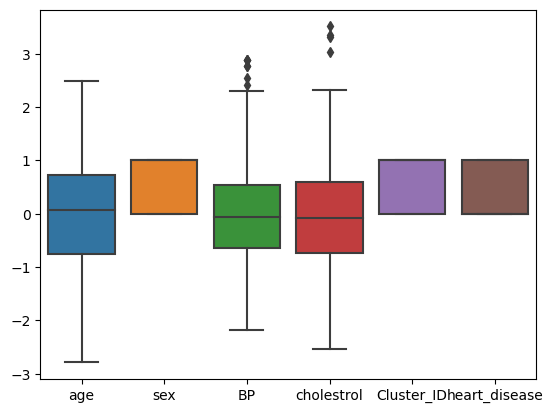

In [110]:
sns.boxplot(data=new_df)

In [111]:
new_df.head()

,age,sex,BP,cholestrol,Cluster_ID,heart_disease
0,1.714372,1.0,-0.054214,1.535340,0.0,1
2,0.287373,1.0,-0.407269,0.266060,1.0,1
3,1.055757,1.0,-0.171899,0.307676,0.0,0
4,2.153448,0.0,-0.642639,0.432523,0.0,0
5,1.165526,1.0,-0.642639,-1.481801,1.0,0


### 4) The Sample Size is Sufficiently Large :- Logistic regression assumes that the sample size of the dataset if large enough to draw valid conclusions from the fitted logistic regression model.

In [112]:
X_train.shape, X_test.shape

((213, 5), (54, 5))

80% is our trainning data.

### 5) Independence of observations: Each observation in the data should be independent of all other observations. This means that the value of the dependent variable for one observation should not depend on the value of the dependent variable for any other observation.

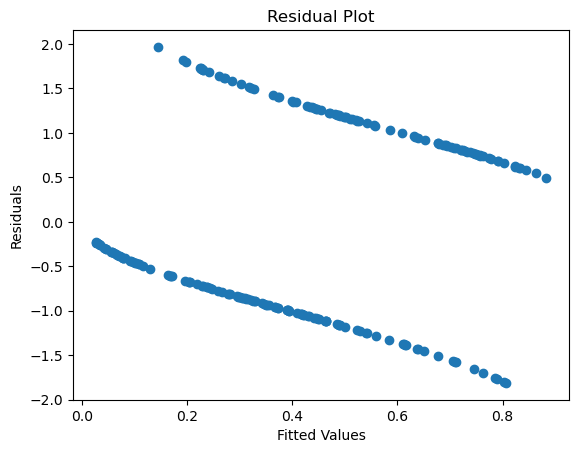

No autocorrelation


In [113]:
from statsmodels.stats.stattools import durbin_watson

# Plot the residuals

residuals = res.resid_deviance
fitted_values = res.fittedvalues
plt.scatter(fitted_values, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Calculate the Durbin-Watson test statistic

dw = durbin_watson(residuals)

if dw < 1.5:
    print("Positive autocorrelation")
elif dw > 2.5:
    print("Negative autocorrelation")
else:
    print("No autocorrelation")


### All the assumptions are met.

# Evalution of Model 1 (Logistic Regression on Trainning data)

### 1) Confusion matrix :- A confusion matrix shows the number of true positives, true negatives, false positives, and false negatives predicted by the model. It can be used to calculate various performance measures, such as accuracy, precision, recall, and F1-score.

* True Positive (TP): The model predicted a positive label and the actual label was also positive.


* False Positive (FP): The model predicted a positive label but the actual label was negative.


* False Negative (FN): The model predicted a negative label but the actual label was positive.


* True Negative (TN): The model predicted a negative label and the actual label was also negative.

In [114]:
from sklearn import metrics
from sklearn.metrics import classification_report

confusion = metrics.confusion_matrix(y_train_pred_final.heart_disease, y_train_pred_final.predicted)
confusion

array([[100,  23],
       [ 39,  51]], dtype=int64)

<AxesSubplot:>

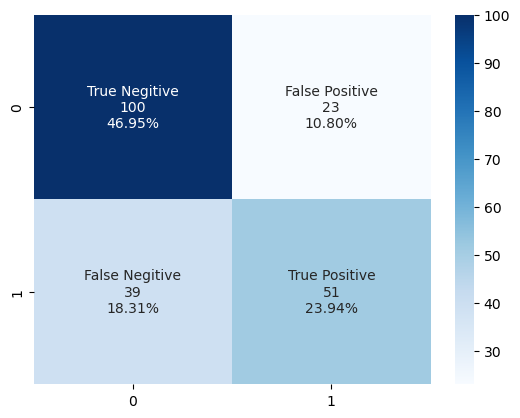

In [115]:

group_names = ['True Negitive','False Positive','False Negitive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt="", cmap='Blues')

In [116]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives  
FP = confusion[0,1] # false positives / Type I Error 
FN = confusion[1,0] # false negatives / Type II Error 

In [117]:
# Calculate various metrics
tn, fp, fn, tp = confusion.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
Error_Rate = (FP+FN)/float(TP+TN+FP+FN)
Specificity = TN /float(TN+FP)       #specificity (true negative rate)
False_Postive_Rate = FP/float(TN+FP)
Negative_predictive_value = TN/float(TN+ FN)

In [118]:
# Print the metrics
print("True Negatives        : ", tn)
print("False Positives       : ", fp)
print("False Negatives       : ", fn)
print("True Positives        : ", tp)
print("-"*50)
print("Accuracy                 : {:.2f}%".format(accuracy*100))
print("Precision                : {:.2f}%".format(precision*100))
print("Recall/Sensitivity       : {:.2f}%".format(recall*100))
print("F1 Score                 : {:.2f}%".format(f1_score*100))
print("Error Rate               : {:.2f}%".format(Error_Rate*100))
print("Specificity              : {:.2f}%".format(Specificity*100))
print("False Postive Rate       : {:.2f}%".format(False_Postive_Rate*100))
print("Negative Predictive Value: {:.2f}%".format(Negative_predictive_value*100))

True Negatives        :  100
False Positives       :  23
False Negatives       :  39
True Positives        :  51
--------------------------------------------------
Accuracy                 : 70.89%
Precision                : 68.92%
Recall/Sensitivity       : 56.67%
F1 Score                 : 62.20%
Error Rate               : 29.11%
Specificity              : 81.30%
False Postive Rate       : 18.70%
Negative Predictive Value: 71.94%


* Accuracy :- The number of predictions that the model got right.
    
    
* Error Rate :- The number of predictions that the model got wrong.  
    
    
* Precision :- When the model predicts Yes. How often is it actually yes?
* Precision is a measure of the model's ability to correctly identify positive instances. 


* Recall :- When it is actually Yes. How often does it predicted Yes?
* Sensitivity, also known as recall or (true positive rate).


* Specificity (true negative rate) is the probability of a negative test result, conditioned on the individual truly being negative.


* F1 score is a weighted average of precision and recall

### Classification Report

In [119]:
# Generate classification report
class_report = classification_report(y_train_pred_final.heart_disease, y_train_pred_final.predicted)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       123
           1       0.69      0.57      0.62        90

    accuracy                           0.71       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.71      0.71      0.70       213



##  Log-Loss Score


the log-loss score measures the performance of a classification model where the predicted output is a probability value between 0 and 1. It penalizes incorrect predictions that are confident and assigns a higher loss to those predictions. A lower log-loss score indicates better performance of the model.

In [120]:
from sklearn.metrics import log_loss

# Compute the log-loss

log_loss_score = log_loss(y_train_pred_final.heart_disease, y_train_pred_final.predicted)
print("Log-Loss: ", log_loss_score)

Log-Loss:  10.053626888381958


### 2) Plotting the ROC Curve


An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:


* True Positive Rate
* False Positive Rate

In [121]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [122]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.heart_disease, y_train_pred_final.heart_disease_Prob,
                                         drop_intermediate = False )

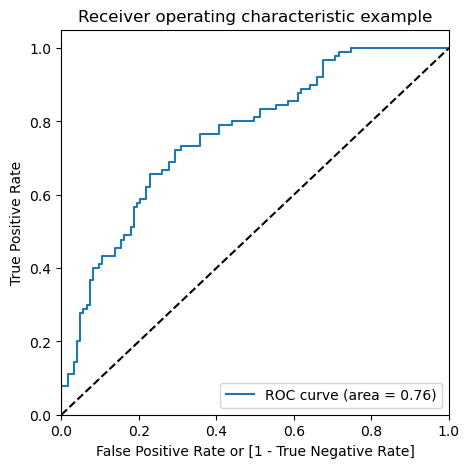

In [123]:
draw_roc(y_train_pred_final.heart_disease, y_train_pred_final.heart_disease_Prob)

 ## 3) Finding Optimal Cutoff Point

In [124]:
numbers = [float(x)/10 for x in range(10)]
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [125]:
y_train_pred_final.heart_disease_Prob

0      0.523948
1      0.230736
2      0.321338
3      0.448052
4      0.630951
         ...   
208    0.420217
209    0.691053
210    0.803315
211    0.226924
212    0.756718
Name: heart_disease_Prob, Length: 213, dtype: float64

In [126]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.heart_disease_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.sample(5)

,heart_disease,heart_disease_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
48,0,0.301306,0,1,1,1,1,0,0,0,0,0,0
16,1,0.446568,0,1,1,1,1,1,0,0,0,0,0
29,1,0.192322,0,1,1,0,0,0,0,0,0,0,0
19,0,0.367490,0,1,1,1,1,0,0,0,0,0,0
203,0,0.025815,0,1,0,0,0,0,0,0,0,0,0


In [127]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['probability','accuracy','sensitivity','specitivity'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.heart_disease, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specitivity
0.0          0.0  0.422535     1.000000     0.000000
0.1          0.1  0.539906     1.000000     0.203252
0.2          0.2  0.577465     0.966667     0.292683
0.3          0.3  0.610329     0.844444     0.439024
0.4          0.4  0.690141     0.755556     0.642276
0.5          0.5  0.708920     0.566667     0.813008
0.6          0.6  0.685446     0.444444     0.861789
0.7          0.7  0.666667     0.311111     0.926829
0.8          0.8  0.605634     0.088889     0.983740
0.9          0.9  0.577465     0.000000     1.000000


<Figure size 1100x1100 with 0 Axes>

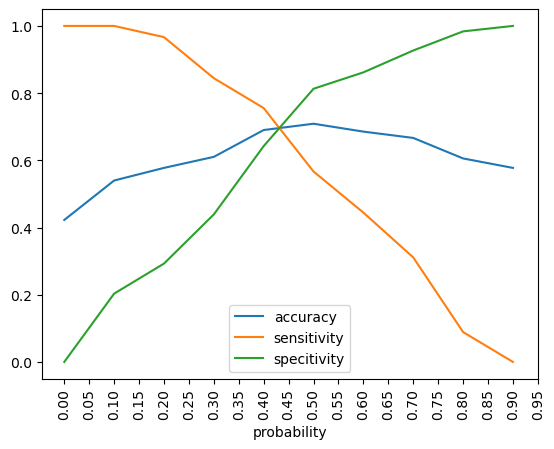

<Figure size 1100x1100 with 0 Axes>

In [128]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specitivity'])

plt.xticks(np.arange(0, 1, step=0.05), rotation = 90)

plt.figure(figsize=(11,11))


From the curve above, 0.45 is the optimum point to take it as a cutoff probability.

In [129]:
y_train_pred_final['final_predicted'] = y_train_pred_final.heart_disease_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_train_pred_final.sample(8)

,heart_disease,heart_disease_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
59,0,0.523797,1,1,1,1,1,1,1,0,0,0,0,1
125,1,0.317722,0,1,1,1,1,0,0,0,0,0,0,0
117,1,0.272008,0,1,1,1,0,0,0,0,0,0,0,0
189,1,0.677188,1,1,1,1,1,1,1,1,0,0,0,1
211,1,0.226924,0,1,1,1,0,0,0,0,0,0,0,0
78,1,0.679643,1,1,1,1,1,1,1,1,0,0,0,1
91,0,0.077517,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.230736,0,1,1,1,0,0,0,0,0,0,0,0


## Evaluate the performance after finding the correct optimum point

In [130]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.heart_disease, y_train_pred_final.final_predicted)

0.704225352112676

In [131]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.heart_disease, y_train_pred_final.final_predicted )
confusion2

array([[90, 33],
       [30, 60]], dtype=int64)

<AxesSubplot:>

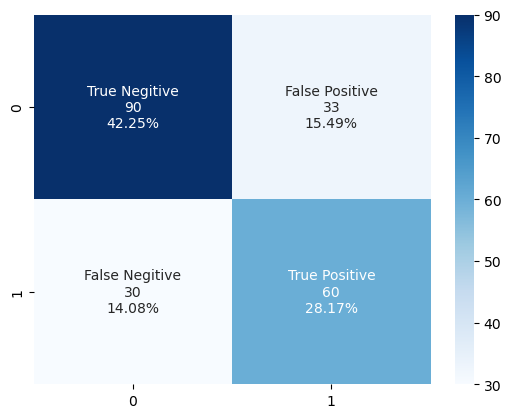

In [132]:
group_names = ['True Negitive','False Positive','False Negitive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion2.flatten()/np.sum(confusion2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion2, annot=labels, fmt="", cmap='Blues')

In [133]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [134]:
# Calculate various metrics
tn, fp, fn, tp = confusion2.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
Error_Rate = (FP+FN)/float(TP+TN+FP+FN)
Specificity = TN /float(TN+FP)       #specificity (true negative rate)
False_Postive_Rate = FP/float(TN+FP)
Negative_predictive_value = TN/float(TN+ FN)


# Print the metrics
print("True Negatives        : ", tn)
print("False Positives       : ", fp)
print("False Negatives       : ", fn)
print("True Positives        : ", tp)
print("-"*50)
print("Accuracy                 : {:.2f}%".format(accuracy*100))
print("Precision                : {:.2f}%".format(precision*100))
print("Recall/Sensitivity       : {:.2f}%".format(recall*100))
print("F1 Score                 : {:.2f}%".format(f1_score*100))
print("Error Rate               : {:.2f}%".format(Error_Rate*100))
print("Specificity              : {:.2f}%".format(Specificity*100))
print("False Postive Rate       : {:.2f}%".format(False_Postive_Rate*100))
print("Negative Predictive Value: {:.2f}%".format(Negative_predictive_value*100))

True Negatives        :  90
False Positives       :  33
False Negatives       :  30
True Positives        :  60
--------------------------------------------------
Accuracy                 : 70.42%
Precision                : 64.52%
Recall/Sensitivity       : 66.67%
F1 Score                 : 65.57%
Error Rate               : 29.58%
Specificity              : 73.17%
False Postive Rate       : 26.83%
Negative Predictive Value: 75.00%


# Evaulation and Predictions of Model on Test Data

In [135]:
X_test = X_test[col]
X_test.head()

,age,sex,BP,cholestrol,Cluster_ID
85,-1.359164,1.0,1.004950,-0.087674,1.0
47,-1.139626,1.0,-1.231064,-1.065643,1.0
186,0.177604,1.0,0.063471,-1.336145,1.0
239,-0.261473,1.0,-0.642639,1.597763,0.0
180,-1.359164,1.0,-0.642639,-0.170905,1.0


In [136]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = res.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
85,0.371095
47,0.267894
186,0.409325
239,0.708812
180,0.326876


In [137]:
# Adding the test prediction column with original prediction column

y_pred_final = pd.concat([y_test, y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'heart_disease_Prob'})

y_pred_final.head()

,heart_disease,heart_disease_Prob
85,0,0.371095
47,1,0.267894
186,1,0.409325
239,0,0.708812
180,0,0.326876


In [138]:
# making a new column according optimum cutoff point

y_pred_final['final_predicted'] = y_pred_final.heart_disease_Prob.map(lambda x: 1 if x > 0.45 else 0)

y_pred_final.head()

,heart_disease,heart_disease_Prob,final_predicted
85,0,0.371095,0
47,1,0.267894,0
186,1,0.409325,0
239,0,0.708812,1
180,0,0.326876,0


## Confusion Matrix

In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.heart_disease, y_pred_final.final_predicted)

0.5555555555555556

In [140]:
confusion2 = metrics.confusion_matrix(y_pred_final.heart_disease, y_pred_final.final_predicted )
confusion2

array([[18,  8],
       [16, 12]], dtype=int64)

<AxesSubplot:>

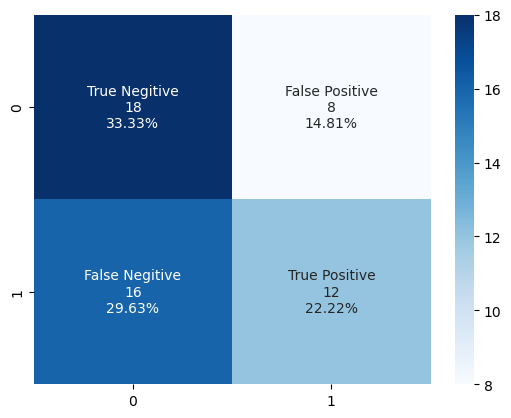

In [141]:
group_names = ['True Negitive','False Positive','False Negitive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion2.flatten()/np.sum(confusion2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion2, annot=labels, fmt="", cmap='Blues')

In [142]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [143]:
# Calculate various metrics
tn, fp, fn, tp = confusion2.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
Error_Rate = (FP+FN)/float(TP+TN+FP+FN)
Specificity = TN /float(TN+FP)       #specificity (true negative rate)
False_Postive_Rate = FP/float(TN+FP)
Negative_predictive_value = TN/float(TN+ FN)

In [144]:
# Print the metrics
print("True Negatives        : ", tn)
print("False Positives       : ", fp)
print("False Negatives       : ", fn)
print("True Positives        : ", tp)
print("-"*50)
print("Accuracy                 : {:.2f}%".format(accuracy*100))
print("Precision                : {:.2f}%".format(precision*100))
print("Recall/Sensitivity       : {:.2f}%".format(recall*100))
print("F1 Score                 : {:.2f}%".format(f1_score*100))
print("Error Rate               : {:.2f}%".format(Error_Rate*100))
print("Specificity              : {:.2f}%".format(Specificity*100))
print("False Postive Rate       : {:.2f}%".format(False_Postive_Rate*100))
print("Negative Predictive Value: {:.2f}%".format(Negative_predictive_value*100))

True Negatives        :  18
False Positives       :  8
False Negatives       :  16
True Positives        :  12
--------------------------------------------------
Accuracy                 : 55.56%
Precision                : 60.00%
Recall/Sensitivity       : 42.86%
F1 Score                 : 50.00%
Error Rate               : 44.44%
Specificity              : 69.23%
False Postive Rate       : 30.77%
Negative Predictive Value: 52.94%


In [145]:
# Generate classification report
class_report = classification_report(y_pred_final.heart_disease, y_pred_final.final_predicted)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60        26
           1       0.60      0.43      0.50        28

    accuracy                           0.56        54
   macro avg       0.56      0.56      0.55        54
weighted avg       0.57      0.56      0.55        54



##  Log-Loss Score

In [146]:
# Compute the log-loss

log_loss_score = log_loss(y_pred_final.heart_disease, y_pred_final.final_predicted)
print("Log-Loss: ", log_loss_score)

Log-Loss:  15.350685745505519


# Conlclusion 
For Logistic Regression we found the Area under ROC to be 76% and accuracy on Test data to be 55.56%
* Specificity is 69.23%
* Sensitivity/Recall is 42.86%

### Model don't give good accuracy because the dataset contains very less amount of data and consists less features. 

# Save Trained Model To a File Using Joblib

In [147]:
import joblib

joblib.dump(res, 'Heart_Disease_Prediction_joblib')

['Heart_Disease_Prediction_joblib']

### How to resolve this error for personal understanding:-

### This error occurs when you have to predict the cluster_ID using statsmodels. To resolve this error you have do this :- 


* As a result, the error message "PerfectSeparationError: Perfect separation detected, results not available" is displayed, indicating that the model cannot provide results due to the presence of perfect separation.


* To address this issue, one can consider a few options, such as:


* Adding more data to increase the variability of the predictor variables
* Reducing the number of predictor variables in the model
* Adding a regularization term to the logistic regression model to prevent overfitting
* Using alternative modeling techniques, such as decision trees or support vector machines, that are not as sensitive to perfect separation.